In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


movies = pd.read_csv('tmdb_movies.csv')
movies.head()

genres = pd.read_csv('tmdb_genres.csv')
genres.head()

movies.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0


In [4]:
q3 = movies['vote_count'].quantile(0.75)
above_q3 = movies[movies['vote_count'] > q3]            #filtrowanie za pomocą maski


above_q3.head(10)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0
5,5,258000000,http://www.sonypictures.com/movies/spider-man3/,559,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,2007-05-01,890871626,139.0,Released,The battle within.,Spider-Man 3,5.9,3576,14.0
6,6,260000000,http://disney.go.com/disneypictures/tangled/,38757,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,2010-11-24,591794936,100.0,Released,They're taking adventure to new lengths.,Tangled,7.4,3330,16.0
7,7,280000000,http://marvel.com/movies/movie/193/avengers_ag...,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,2015-04-22,1405403694,141.0,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,28.0
8,8,250000000,http://harrypotter.warnerbros.com/harrypottera...,767,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,2009-07-07,933959197,153.0,Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,12.0
9,9,250000000,http://www.batmanvsupermandawnofjustice.com/,209112,en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,2016-03-23,873260194,151.0,Released,Justice or revenge,Batman v Superman: Dawn of Justice,5.7,7004,28.0


In [5]:
#przekształcenie formatu daty
movies['release_date'] = pd.to_datetime(movies['release_date'])    

# stworzenie maski logicznej (warunku), która wybiera tylko te wiersze, gdzie rok premiery filmu mieści się w przedziale 2010–2016
mask = (movies['release_date'].dt.year >= 2010) & ( movies['release_date'].dt.year <= 2016) 

# filtrowanie danych według maski (czyli tylko filmy z lat 2010–2016)
# grupowanie filmów według roku premiery
# obliczanie średnich wartości przychodu ('revenue') i budżetu ('budget') dla każdego roku
wynik_finansowy = movies[mask].groupby(movies['release_date'].dt.year)[['revenue', 'budget']].mean().round(0)

wynik_finansowy

,revenue,budget
release_date,,
2010.0,90438110.0,34495411.0
2011.0,92004131.0,34772320.0
2012.0,116065915.0,34922032.0
2013.0,101348456.0,35523294.0
2014.0,101346599.0,30959888.0
2015.0,105439927.0,31132164.0
2016.0,139049586.0,45703269.0


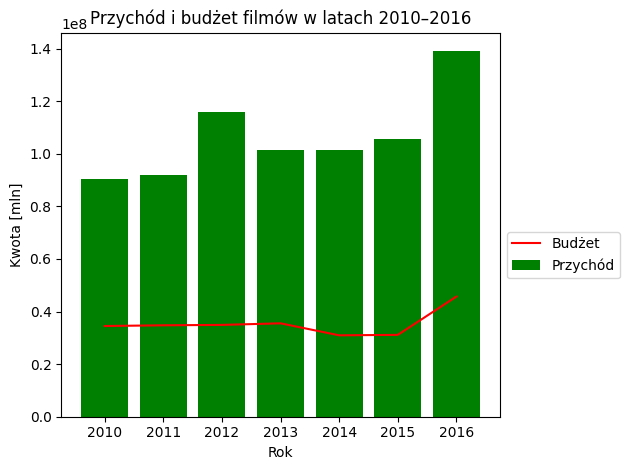

In [6]:
figure, axes = plt.subplots()

#wykres słupkowy
axes.bar(wynik_finansowy.index, wynik_finansowy['revenue'], color = 'green', label = 'Przychód')
#wykres liniowy             
axes.plot(wynik_finansowy.index, wynik_finansowy['budget'], color = 'red', label = 'Budżet')

#modyfikacja wykresu
axes.set_title("Przychód i budżet filmów w latach 2010–2016")
axes.set_xlabel('Rok')
axes.set_ylabel('Kwota [mln]')

#legenda
axes.legend(loc = 'upper left', bbox_to_anchor = (1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
genres.columns.values[0] = 'genre_id'
genres.head()

#dodanie kolumny gatunku
movies_genres = pd.merge(movies, genres, how = 'inner', on = 'genre_id')
movies_genres.rename(columns = {'genres': 'genre'}, inplace = True)
movies_genres.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genre
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action


In [17]:
#segregacja po gatunkach
top_genres = movies_genres.value_counts('genre', normalize = True).round(2).head(5)
print(top_genres)

movies_genres['genre'].value_counts().head(1)

genre
Drama        0.25
Comedy       0.22
Action       0.16
Adventure    0.07
Horror       0.06
Name: proportion, dtype: float64


genre
Drama    1207
Name: count, dtype: int64

In [36]:
#średnia trwania filmu dla danego gatunku
movies_genres['runtime'].dtype

genres_runtime = movies_genres.groupby('genre')[['runtime']].mean().sort_values(by = 'runtime', ascending = False).round(2)
genres_runtime


,runtime
genre,
History,133.96
War,126.12
Western,117.93
Drama,115.52
Adventure,113.06
Crime,112.14
TV Movie,110.50
Action,109.06
Science Fiction,109.03


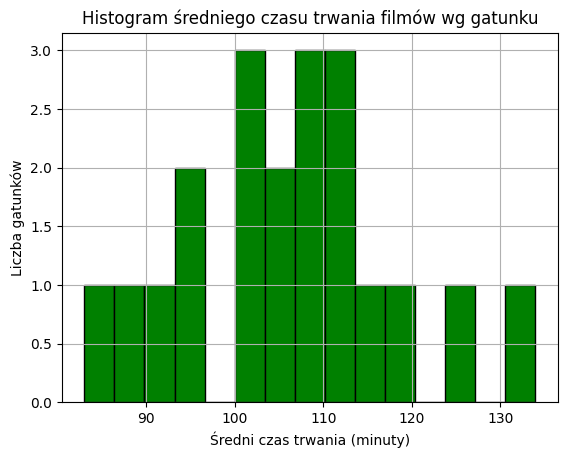

In [ ]:
#histogram przedstawiający podział liczby gatunków na rpzedziały czasowe
genres_runtime['runtime'].hist(bins=15, edgecolor='black', color = 'green')
plt.title("Histogram średniego czasu trwania filmów wg gatunku")
plt.xlabel("Średni czas trwania (minuty)")
plt.ylabel("Liczba gatunków")
plt.grid(True)
plt.show()